In [682]:
import pandas as pd;

train = "./data_set/train_data.csv";
train = pd.read_csv(train);

test = "./data_set/test_data.csv";
test = pd.read_csv(test);


print(train.shape)
#we have 614 rows and 13 columns in train data set
#classification problem
#given all the 12 variables we have to determine if the applicant will be allowed to take loan from bank or not
#thus loan_status will be predicted

print(test.shape)
#we have 367 rows and 12 columns in test data set since last column of loan_status is not included

(614, 13)
(367, 12)


In [683]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [684]:
#cleaning and pre processing data
data = pd.concat([train,test])

#dropping id
data = data.drop("Loan_ID",axis = "columns")


In [685]:
#for missing values
data.isnull().any()

#for nan values in categorical columns, replacing nan with most frequetly occuring value 

#1st  categorical variable with null values variable gender
print(data['Gender'].mode())
data['Gender'].fillna('Male',inplace = True)

#2nd  categorical variable with null values variable martial status
print(data['Married'].mode())
data['Married'].fillna('Yes',inplace = True)

#3rd  categorical variable with null values variable dependent
print(data['Dependents'].mode())
data['Dependents'].fillna(0,inplace = True)

#4th categorical variable with null values self employed
print(data['Self_Employed'].mode())
data['Self_Employed'].fillna('No',inplace = True)

#5th categorical variable with null values credit history
print(data['Credit_History'].mode())
data['Credit_History'].fillna(1,inplace = True)


#try1
#since number of non nan data fields is very less in terms of non categorical columns dropping these cols
#data.dropna(subset=['LoanAmount','Loan_Amount_Term'],inplace = True)
#data.head()

#try2
#for nan values in non categorical columns ie [loan amount and loan amount term] replacing with mean 
mean_value = data['LoanAmount'].mean()
data['LoanAmount'].fillna(mean_value,inplace = True)

mean_value = data['Loan_Amount_Term'].mean()
data['Loan_Amount_Term'].fillna(mean_value,inplace = True)


0    Male
Name: Gender, dtype: object
0    Yes
Name: Married, dtype: object
0    0
Name: Dependents, dtype: object
0    No
Name: Self_Employed, dtype: object
0    1.0
Name: Credit_History, dtype: float64


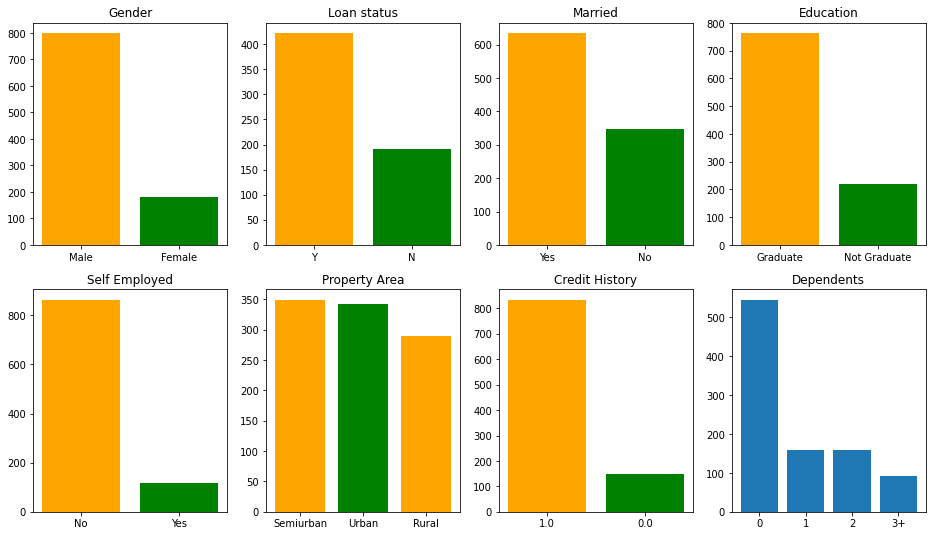

In [686]:
#Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2,4,figsize=(16,9))

count = data['Gender'].value_counts()
plt.subplot(2,4,1)
plt.bar(count.index.map(str),count.values,color = ["orange","green"])
plt.title("Gender")

count = data['Loan_Status'].value_counts()
plt.subplot(2,4,2)
plt.bar(count.index.map(str),count.values,color = ["orange","green"])
plt.title("Loan status")

count = data['Married'].value_counts()
plt.subplot(2,4,3)
plt.bar(count.index.map(str),count.values,color = ["orange","green"])
plt.title("Married")

count = data['Education'].value_counts()
plt.subplot(2,4,4)
plt.bar(count.index.map(str),count.values,color = ["orange","green"])
plt.title("Education")

count = data['Self_Employed'].value_counts()
plt.subplot(2,4,5)
plt.bar(count.index.map(str),count.values,color = ["orange","green"])
plt.title("Self Employed")

count = data['Property_Area'].value_counts()
plt.subplot(2,4,6)
plt.bar(count.index.map(str),count.values,color = ["orange","green"])
plt.title("Property Area")

count = data['Credit_History'].value_counts()
plt.subplot(2,4,7)
plt.bar(count.index.map(str),count.values,color = ["orange","green"])
plt.title("Credit History")

count = data['Dependents'].value_counts()
plt.subplot(2,4,8)
plt.bar(count.index.map(str),count.values)
plt.title("Dependents")

plt.show()

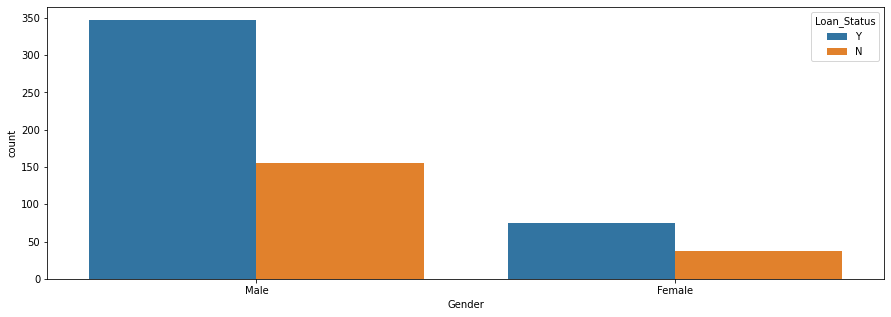

In [687]:
#Exploration of gender in relation to loan approvals
plt.figure(figsize=(15,5))
sns.countplot(x='Gender', hue='Loan_Status', data=data);

#No pattern here males as well as females get loans in similar hit ratio

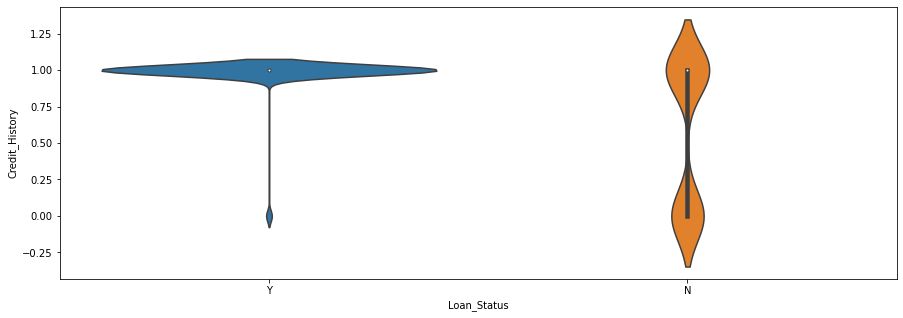

In [688]:
#Exploration of credit history

plt.figure(figsize=(15,5))
sns.violinplot(x='Loan_Status', y='Credit_History', data=data);

#It can be seen that if you got a Credit History = 1, you have a better chance to get a loan. 
#This is an important feature for our future analysis. But we can clearly see this is actually a categorical 
#variable, as we can see that it is 1 or 2

<AxesSubplot:xlabel='Married', ylabel='count'>

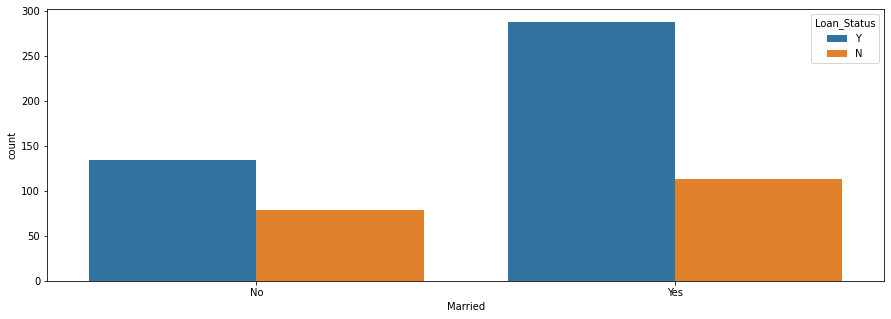

In [689]:
#Exploration of marriage in relation to loan approvals

plt.figure(figsize=(15,5))
sns.countplot(x="Married",hue="Loan_Status",data=data)

#Married people have a better chance of getting a loan

<AxesSubplot:xlabel='Education', ylabel='count'>

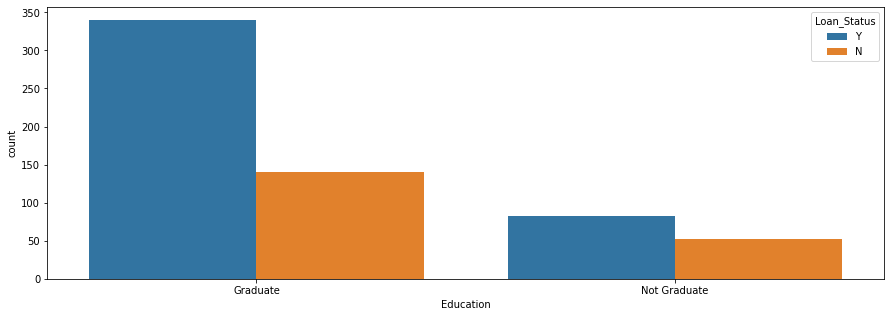

In [690]:
#Exploration of education

plt.figure(figsize=(15,5))
sns.countplot(x="Education", hue="Loan_Status",data=data)

#Graduates have better chance of loan approval can be deemed as an important feature

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

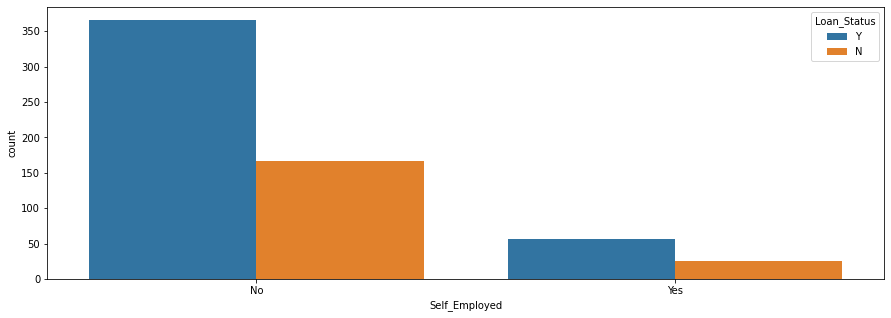

In [691]:
#Exploration of self-employement category

plt.figure(figsize=(15,5))
sns.countplot(x="Self_Employed", hue="Loan_Status",data=data)

#same ratio of approvals in case of both categories ie people who are self employed as well as people who are not, not an important feature

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

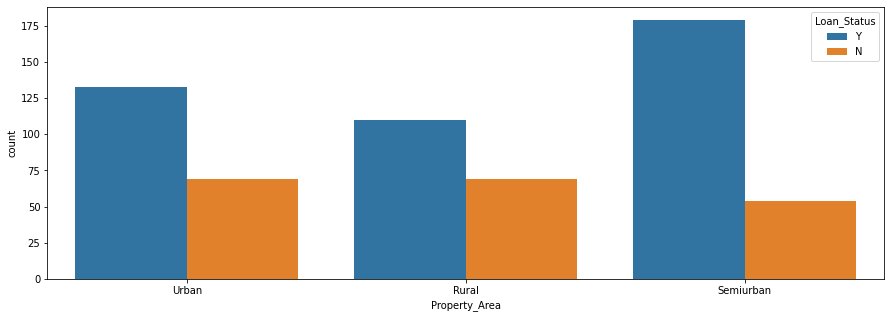

In [692]:
#Exploration of Property area

plt.figure(figsize=(15,5))
sns.countplot(x="Property_Area", hue="Loan_Status",data=data)

#People in semi urban areas have higher chances of loan approval

<AxesSubplot:xlabel='Dependents', ylabel='count'>

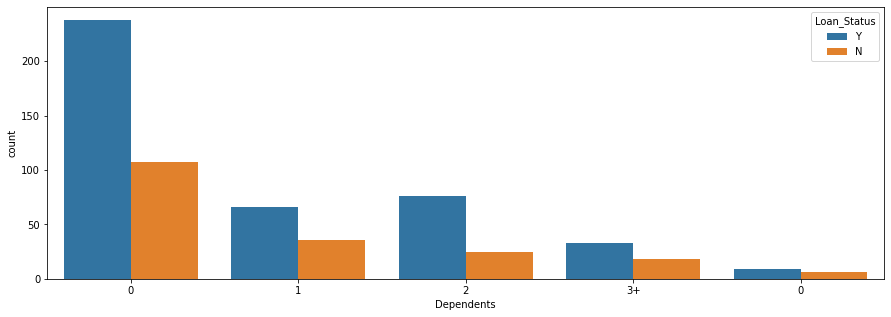

In [693]:
#Exploration of Dependents

plt.figure(figsize=(15,5))
sns.countplot(x="Dependents", hue="Loan_Status",data=data)

#if applicants have zero dependent members they have higher approval rates

In [694]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.114247,0.547188,-0.023051,0.020201
CoapplicantIncome,-0.114247,1.000000,0.178449,-0.043705,-0.011531
LoanAmount,0.547188,0.178449,1.000000,0.054827,-0.003577
Loan_Amount_Term,-0.023051,-0.043705,0.054827,1.000000,-0.018377
Credit_History,0.020201,-0.011531,-0.003577,-0.018377,1.000000


In [695]:
#Feature extraction

#As we saw earlier, there are some features that seem more useful for this project than others. 
#Given this, one of our goals will be to drop the following features: ['Loan_ID','ApplicantIncome','LoanAmount', 
#'Loan_Amount_Term', 'Gender','Self_Employed']; that were declared not interesting during the previous discussion.


#dropping id
data = data.drop("Gender",axis = "columns")
data = data.drop("ApplicantIncome",axis="columns")
data = data.drop("LoanAmount",axis="columns")
data = data.drop("Loan_Amount_Term",axis="columns")
data = data.drop("Self_Employed",axis="columns")

In [696]:
#we have removed all missing values from data set now mapping non integer values to integer before passing it to model trainers

#data['Gender'] = data['Gender'].map({'Male':0,'Female':'1'}).astype(int)

data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype(int)

print(data['Dependents'].unique())
data['Dependents'] = data['Dependents'].map({'1':1, '0':0, '2':2 ,'3+':3,0:0})

#data['Self_Employed'] = data['Self_Employed'].map({'No':0,'Yes':1}).astype(int)

data['Education'] = data['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(int)

data['Credit_History'] = data['Credit_History'].map(int)

print(data['Property_Area'].unique())
data['Property_Area'] = data['Property_Area'].map({'Urban':0,'Rural':1, 'Semiurban':2}).astype(int)

['0' '1' '2' '3+' 0]
['Urban' 'Rural' 'Semiurban']


In [697]:
#splitting train data to get new train and new test
#since we merged 614 data fields of initial trainset that has loan status in it we will split similarly
#RangeIndex: 614 entries, 0 to 613
#due to dropping of some data manually recomputing range index (36 values were dropped)
new_train = data.iloc[:614]
new_test = data.iloc[614:]
new_train.isnull().sum()

Married              0
Dependents           0
Education            0
CoapplicantIncome    0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [698]:
#mapping yes to 1 and no to 0 in loan status
new_train['Loan_Status'] = new_train['Loan_Status'].map({'Y':1,'N':0}).astype(int)

new_train.corr()

#loan status has strong correlation to credit history

C:\Users\mihir\AppData\Local\Temp\ipykernel_7532\1478414176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train['Loan_Status'] = new_train['Loan_Status'].map({'Y':1,'N':0}).astype(int)


,Married,Dependents,Education,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
Married,1.000000,0.334216,-0.012304,0.075948,0.010938,0.003071,0.091478
Dependents,0.334216,1.000000,-0.055752,0.030430,-0.040160,0.001781,0.010118
Education,-0.012304,-0.055752,1.000000,0.062290,0.073658,0.003592,0.085884
CoapplicantIncome,0.075948,0.030430,0.062290,1.000000,0.011134,-0.028356,-0.059187
Credit_History,0.010938,-0.040160,0.073658,0.011134,1.000000,0.030248,0.540556
Property_Area,0.003071,0.001781,0.003592,-0.028356,0.030248,1.000000,0.103253
Loan_Status,0.091478,0.010118,0.085884,-0.059187,0.540556,0.103253,1.000000


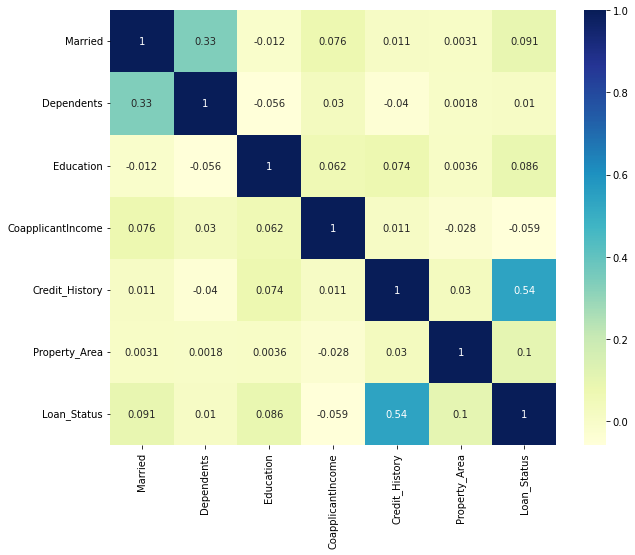

In [699]:
#correlation, with other numeric variables now added

fig, ax = plt.subplots(figsize=(10, 8))
correlations_ML = new_train.corr()
sns.heatmap(correlations_ML, cmap="YlGnBu", annot=True)
plt.show()

In [700]:
#splitting for dependent and independent/ input(x) and output variables(y)
x = new_train.drop('Loan_Status',axis = 'columns')
y = new_train['Loan_Status']

In [701]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.5)

              precision    recall  f1-score   support

           0       0.88      0.44      0.58        96
           1       0.79      0.97      0.87       211

    accuracy                           0.80       307
   macro avg       0.83      0.70      0.73       307
weighted avg       0.82      0.80      0.78       307

Accuracy_Score = 0.8045602605863192


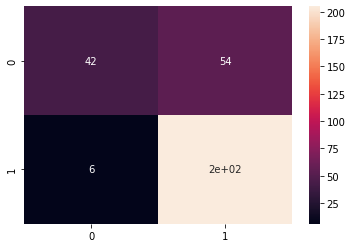

In [710]:
#building model using logistic regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000)
logreg.fit(x_train,y_train)

#getting accuracy of logistic regression
logreg_predict = logreg.predict(x_test)

sns.heatmap(metrics.confusion_matrix(y_test, logreg_predict),annot=True)
print(metrics.classification_report(y_test,logreg_predict))
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, logreg_predict)))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61        96
           1       0.82      0.81      0.82       211

    accuracy                           0.75       307
   macro avg       0.71      0.71      0.71       307
weighted avg       0.75      0.75      0.75       307

Accuracy Score = 0.749185667752443


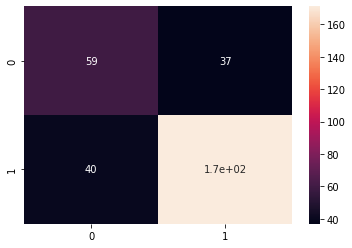

In [708]:
#Building the model using DecisonTree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)


dtree_pred = dt_model.predict(x_test)
sns.heatmap(metrics.confusion_matrix(y_test, dtree_pred),annot=True)
print(metrics.classification_report(y_test, dtree_pred))
print("Accuracy Score =", format(metrics.accuracy_score(y_test,dtree_pred)))

[[ 48  48]
 [ 27 184]]
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        96
           1       0.79      0.87      0.83       211

    accuracy                           0.76       307
   macro avg       0.72      0.69      0.70       307
weighted avg       0.75      0.76      0.75       307

Accuracy: 0.755700325732899


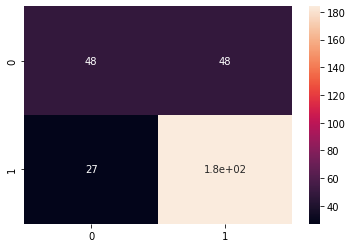

In [707]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)

predict = rf_model.predict(x_test)

sns.heatmap(metrics.confusion_matrix(y_test, predict),annot=True)
print(metrics.classification_report(y_test, predict))
print("Accuracy:", metrics.accuracy_score(predict, y_test))

In [706]:
#finally prediction of our test set
new_test=new_test.drop("Loan_Status",axis="columns")
model.predict(new_test)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,